In [84]:
from others.error_calc import *
import matplotlib.pyplot as plt
import seaborn

In [85]:
# Load two images with OpenCV
nums = ["5", "10", "15"]
num = nums[2]

image1 = cv2.imread(f'tensor_LR_set/output_layer_{num}.png')
image2 = cv2.imread(f'outputs/num{num}.png')
image3 = cv2.imread(f'outputs/no{num}.png')
image4 = cv2.imread(f'tensor_HR_set/output_layer_{num}.png')

# Ensure images are in the right color format (OpenCV uses BGR, PIL uses RGB)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

print("image1 shape = {}, image2 shape = {}, image3 shape = {}".format(image1.shape, image2.shape, image3.shape))

image1 shape = (64, 64, 3), image2 shape = (512, 512, 3), image3 shape = (512, 512, 3)


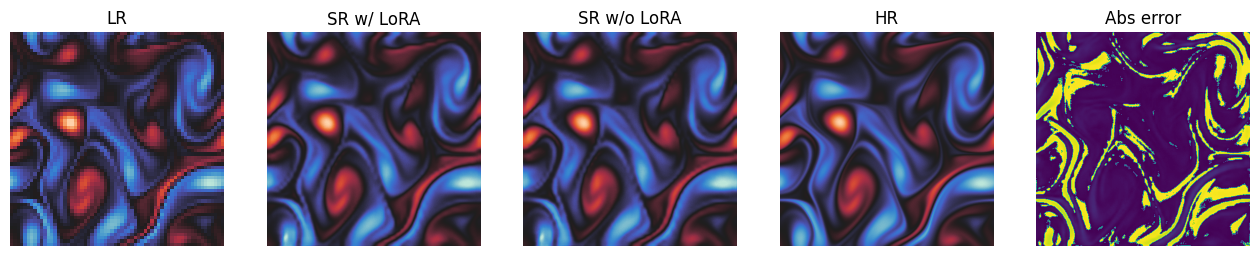

In [86]:

# Create a figure to hold the plots
plt.figure(figsize=(16, 6))

# Plot image1
plt.subplot(1, 5, 1) # 1 row, 2 columns, 1st subplot
plt.imshow(image1[:, :, 0], cmap=seaborn.cm.icefire)
plt.title('LR')
# plt.colorbar()
plt.axis('off') # Hide the axis to focus on the image

# Plot image2
plt.subplot(1, 5, 2) # 1 row, 2 columns, 2nd subplot
plt.imshow(image2[:, :, 0], cmap=seaborn.cm.icefire)
plt.title('SR w/ LoRA')
plt.axis('off') # Hide the axis to focus on the image

# Plot image2
plt.subplot(1, 5, 3) # 1 row, 2 columns, 2nd subplot
plt.imshow(image3[:, :, 0], cmap=seaborn.cm.icefire)
plt.title('SR w/o LoRA')
plt.axis('off') # Hide the axis to focus on the image

# Plot image2
plt.subplot(1, 5, 4) # 1 row, 2 columns, 2nd subplot
plt.imshow(image4[:, :, 0], cmap=seaborn.cm.icefire)
plt.title('HR')
plt.axis('off') # Hide the axis to focus on the image

# Plot image2
plt.subplot(1, 5, 5) # 1 row, 2 columns, 2nd subplot
plt.imshow(np.abs(image4[:, :, 0]-image2[:, :, 0]))
plt.title('Abs error')
plt.axis('off') # Hide the axis to focus on the image

plt.savefig(f"{num}_vor_comp")
# Display the plots
plt.show()

# print(np.max(image4[:, :, 0]))
# print(np.min(image4[:, :, 0]))

In [87]:
image1, image2 = resize_to_match(image1, image2)

mse_value1 = calculate_mse(image2, image4)
print(f"MSE btw image2 and image 4: {mse_value1:.4f}")
mse_value2 = calculate_mse(image3, image4)
print(f"MSE btw image3 and image 4: {mse_value2:.4f}")

div_mean1, div_arr1 = calc_divergence(image4, size=3)
print("div_mean for image4 HR", round(div_mean1, 4))
div_mean2, div_arr2 = calc_divergence(image2, size=3)
print("div_mean for image2 SR w/ LoRA", round(div_mean2, 4))
div_mean3, div_arr3 = calc_divergence(image3, size=3)
print("div_mean for image2 SR w/o LoRA", round(div_mean3, 4))

print(f"{mse_value1:.4f}, {mse_value2:.4f}")
print(round(div_mean1, 4), round(div_mean2, 4), round(div_mean3, 4))

MSE btw image2 and image 4: 26.0795
MSE btw image3 and image 4: 26.6205
div_mean for image4 HR 169.7809
div_mean for image2 SR w/ LoRA 179.2022
div_mean for image2 SR w/o LoRA 179.8316
26.0795, 26.6205
169.7809 179.2022 179.8316


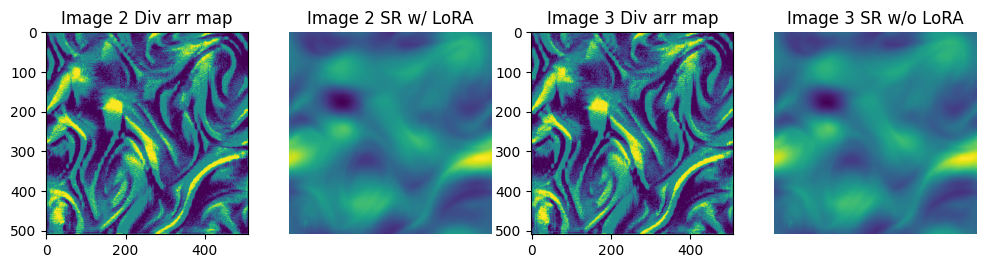

In [88]:
# Create a figure to hold the plots
plt.figure(figsize=(12, 6))

# Plot div arr map
plt.subplot(1, 4, 1) # 1 row, 2 columns, 1st subplot
plt.imshow(div_arr2)
plt.title('Image 2 Div arr map')
# plt.axis('off') # Hide the axis to focus on the image

# Plot image2
plt.subplot(1, 4, 2) # 1 row, 2 columns, 2nd subplot
plt.imshow(image2[:, :, 2:3])
plt.title('Image 2 SR w/ LoRA')
plt.axis('off') # Hide the axis to focus on the image

# Plot image1
plt.subplot(1, 4, 3) # 1 row, 2 columns, 1st subplot
plt.imshow(div_arr3)
plt.title('Image 3 Div arr map')
# plt.axis('off') # Hide the axis to focus on the image

# Plot image2
plt.subplot(1, 4, 4) # 1 row, 2 columns, 2nd subplot
plt.imshow(image3[:, :, 2:3])
plt.title('Image 3 SR w/o LoRA')
plt.axis('off') # Hide the axis to focus on the image

plt.savefig(f"{num}_div_map")
# Display the plots
plt.show()


In [89]:
# image1, image2 = resize_to_match(image1, image2)

# mse_value = calculate_mse(image1, image2)
# print(f"MSE btw image1 and image 2: {mse_value:.4f}")

# div_mean, div_arr = calc_divergence(image1, size=5)
# print("div_mean for image1", round(div_mean, 4))
# div_mean, div_arr = calc_divergence(image2, size=5)
# print("div_mean for image2", round(div_mean, 4))